**Simple linear regression is used to model the relationship between two continuous variables. Often, the objective is to predict the value of an output variable (or response) based on the value of an input (or predictor) variable.**

Horizonatal axis can be called independent variabe and vertical axis can be called dependent variable. So if you have multiple dots in the your graph, in bewtween x axis and y axis, we will try to find a  line that will fit through all the different point in the graph, that is called regression line.  In the end i try to determine the diffrence of each dot from the regression line . The regression line will be out estimated value and other dot will be out actual value, we try to find the difference. We try to minimize the error.

https://www.youtube.com/watch?v=zPG4NjIkCjc

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/content/data (1).csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


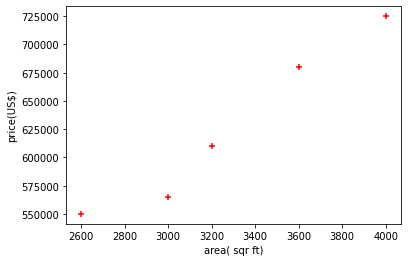

In [48]:
# distribution of data point
%matplotlib inline
plt.xlabel('area( sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color = "red", marker = "+")

Using linear regression

In [49]:
from sklearn import linear_model

In [88]:
regression_obj = linear_model.LinearRegression()
regression_obj.fit(df[['area']],df.price)  
# fitting means that you are feeding the model, the available data points, you are training your model. takes a 2d array.
# 1st is the independent variable{df['area]}, 2nd is the target variable{ df.price}

LinearRegression()

Prediction

In [51]:
print(regression_obj.predict([[3300]])) # it accepts a 2d array

[628715.75342466]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


y = mx + c \
m = coefficient\
c = intercept

In [52]:
m = regression_obj.coef_ # m 
print(m)

[135.78767123]


In [53]:
c = regression_obj.intercept_ # c
print(c)

180616.43835616432


In [54]:
# y = mx + c
# here x is the predicted value earlier,
y = m[0] * 3300 + c
print(y)
# you can see we got the same value, that is how we predicted and got the output. 

628715.7534246575


To see the regression line, according to our predicted plot

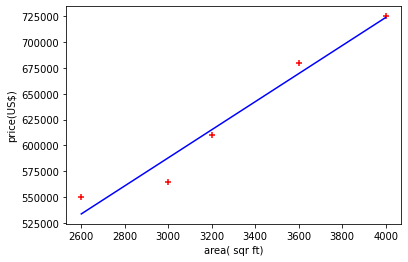

In [60]:
%matplotlib inline
plt.xlabel('area( sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color = "red", marker = "+")
plt.plot(df.area, regression_obj.predict(df[['area']]), color = 'blue')

Now you can have bunch of area and predict the value of the area

In [55]:
df2 = pd.read_csv("/content/data2.csv")
df2

,area,price
0,1500,NaN
1,1600,NaN
2,2800,NaN
3,5000,NaN
4,6000,NaN


In [56]:
df2.drop('price', inplace=True, axis=1) # dropping the price table
df2

,area
0,1500
1,1600
2,2800
3,5000
4,6000


In [57]:
predict = regression_obj.predict(df2)

In [59]:
# adding an column to df2
df2['price'] = predict
df2
# you can see the all predicted prices to its corresponding area

,area,price
0,1500,384297.945205
1,1600,397876.712329
2,2800,560821.917808
3,5000,859554.794521
4,6000,995342.465753


**Exercise**

Predict the canadas per capita in 2022

In [67]:
df3 = pd.read_csv("/content/canada_per_capita_income.csv")
df3.head(3) # some datas

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [64]:
df3.rename(columns = {'per capita income (US$)':'capital'}, inplace = True) # change in column
df3.head(2) # after changes some datas

,year,capital
0,1970,3399.299037
1,1971,3768.297935


**Feed the data**

In [65]:
regression_obj2 = linear_model.LinearRegression()
regression_obj2.fit(df3[['year']],df3.capital)

LinearRegression()

**Prediction**

In [66]:
print(regression_obj2.predict([[2022]])) 

[42945.62424486]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**Part 2 : Multiple variable Linear Regression**

**Step 1** \
press process the data, because data is always messy and you also have a lot of 
unnecsary data, or NaN data. Remove them and clear your dataframe first

In [95]:
df4 = pd.read_csv("/content/homeprices.csv")
df4.head(4) # some datas

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000


In [96]:
# we need to remove the NaN value, for that we need to find the median value
n = df4.bedrooms.median()
n

4.0

In [98]:
# lets fill up the NaN
import numpy as np
new_dataframe = df4.replace(np.nan, n) # replacing it with median value
df4 = new_dataframe
df4.head(4) # some datas

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000


**Step 2:**
Feed the data

In [99]:
regression_obj3 = linear_model.LinearRegression()
regression_obj3.fit(df4[['area','bedrooms','age']],df4.price) 

LinearRegression()

**Step 3** : Predict

In [101]:
print(regression_obj3.predict([[3000,3,40]]))  # 3000 = area, 3 = bedrooms, 40 = age

[498408.25158031]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**Save Model Using Joblib And Pickle**

**1st approach**

In [102]:
import pickle

In [103]:
 # saving model
with open('saved_model', 'wb') as f: # wb = write
  pickle.dump(regression_obj3,f) # it will save the file, see the folder in collab

In [104]:
with open('saved_model', 'rb') as f:
  mp = pickle.load(f)

In [105]:
mp.predict([[3000,3,40]]) # you can see the same result 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

**2nd approach** \
use this when you have numpy array.

In [111]:
import sklearn.externals
import joblib

In [112]:
# save the model
joblib.dump(regression_obj3, "saved_using_joblib") # savdin collab

['saved_using_joblib']

In [114]:
saved = joblib.load("saved_using_joblib")

In [115]:
saved.predict([[3000,3,40]]) # same as the current model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])